In [5]:
#incorporation de la régression logistique au dataframe
#incorporer RD, training des données
#différence des ratings
#catégoriser les équipes
#régression robuste
#ratings précédents, accroissement des ratings

import pandas as pd
import numpy as np
from noe.glickonoe import df_with_ratings

df_with_ratings = df_with_ratings[df_with_ratings["season"] == 2016].tail(len(df_with_ratings.index) - 42)

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

x=df_with_ratings[["rating_home_team","rating_away_team"]]

df_with_ratings["target"]=df_with_ratings["home_score"] > df_with_ratings["away_score"]
y=df_with_ratings["target"]

lr.fit(x,y)

y2=lr.predict(x)

y2_probas=lr.predict_proba(x) #dans le tableau des couples de valeurs, première valeur du couple : proba de défaite de l'équipe domicile
#deuxième valeur : proba de victoire

df_with_ratings.loc[:, "target"]=y2_probas[:, 1] #pour donner une proba de victoire de l'équipe domicile
#cette opération ne prend en compte que la première valeur du couple d'où le 1-

df_with_ratings

/Users/noemikati/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


season_order               home_team               away_team  \
1494             0        Stade Toulousain  Montpellier Herault RC   
1493             1    Stade Francais Paris             Grenoble FC   
1492             2                    Lyon                CA Brive   
1491             3             La Rochelle                Clermont   
1490             4       Castres Olympique         Section Paloise   
1489             5         Bordeaux Begles               Racing 92   
1488             6        Aviron Bayonnais           RC Toulonnais   
1487             7         Section Paloise           RC Toulonnais   
1486             8               Racing 92                    Lyon   
1485             9             Grenoble FC             La Rochelle   
1484            10                CA Brive    Stade Francais Paris   
1483            11        Aviron Bayonnais       Castres Olympique   
1482            12        Stade Toulousain         Bordeaux Begles   
1481            13  Montpellier Herault RC                Clermont   
1480            14    Stade Francais Paris                Clermont   
1479            15         Section Paloise        Aviron Bayonnais   
1478            16                    Lyon             Grenoble FC   
1477            17       Castres Olympique             La Rochelle   
1476            18           RC Toulonnais                CA Brive   
1475            19         Bordeaux Begles  Montpellier Herault RC   
1474            20               Racing 92        Stade Toulousain   
1473            21    Stade Francais Paris       Castres Olympique   
1472            22  Montpellier Herault RC         Section Paloise   
1471            23             La Rochelle                    Lyon   
1470            24         Bordeaux Begles        Aviron Bayonnais   
1469            25                Clermont               Racing 92   
1468            26             Grenoble FC                CA Brive   
1467            27        Stade Toulousain           RC Toulonnais   
1466            28                    Lyon        Stade Toulousain   
1465            29         Section Paloise    Stade Francais Paris   
...            ...                     ...                     ...   
1337           157               Racing 92         Section Paloise   
1336           158           RC Toulonnais        Stade Toulousain   
1335           159           RC Toulonnais       Castres Olympique   
1334           160    Stade Francais Paris         Section Paloise   
1333           161             Grenoble FC                Clermont   
1332           162                CA Brive         Bordeaux Begles   
1331           163                    Lyon             La Rochelle   
1330           164  Montpellier Herault RC        Aviron Bayonnais   
1329           165        Stade Toulousain               Racing 92   
1328           166       Castres Olympique    Stade Francais Paris   
1327           167  Montpellier Herault RC               Racing 92   
1326           168       Castres Olympique        Stade Toulousain   
1325           169         Section Paloise                CA Brive   
1324           170                    Lyon                Clermont   
1323           171        Aviron Bayonnais             Grenoble FC   
1322           172         Bordeaux Begles           RC Toulonnais   
1321           173             La Rochelle  Montpellier Herault RC   
1320           174    Stade Francais Paris               Racing 92   
1319           175        Stade Toulousain        Aviron Bayonnais   
1318           176           RC Toulonnais         Section Paloise   
1317           177               Racing 92         Bordeaux Begles   
1316           178  Montpellier Herault RC    Stade Francais Paris   
1315           179             Grenoble FC                    Lyon   
1314           180                Clermont             La Rochelle   
1313           181                CA Brive       Castres Olympique   
1312           1

In [6]:
#évaluation de la précision des résultats

from sklearn.metrics import accuracy_score

accuracy_score(y,y2)

0.7540106951871658

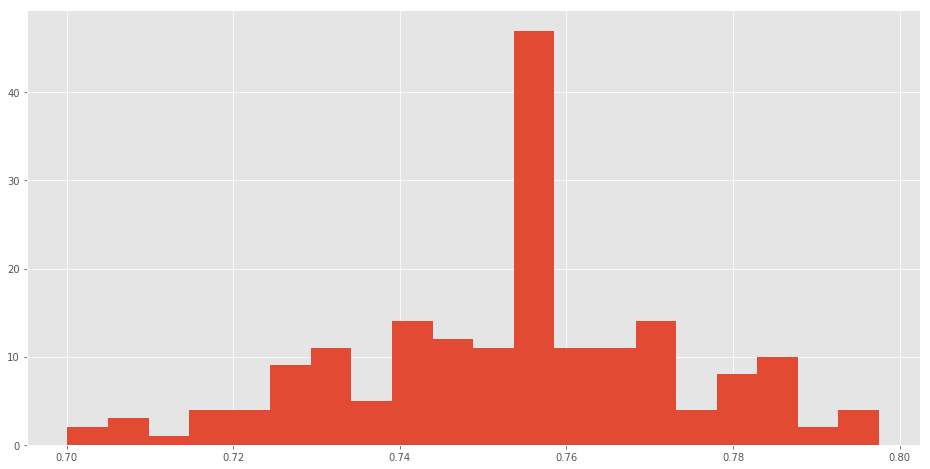

In [7]:
df_with_ratings["target"].hist(bins=20)

In [8]:
y2

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,